In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
import vega_datasets
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
lag = 3
model = AutoReg(df.Consumption, lag)
model = model.fit()
r2_score(df.Consumption.loc[lag:], model.predict()[lag:])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


0.413545824620392

In [4]:
from statsmodels.tsa.arima.model import ARIMA

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [11]:
# train_idx_cutoff = int(.95 * df.shape[0])
# train = df.Consumption[:train_idx_cutoff]
# test = df.Consumption[train_idx_cutoff:]
train = df.Consumption[:'2016']
test = df.Consumption['2017']

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will cont

<AxesSubplot:>

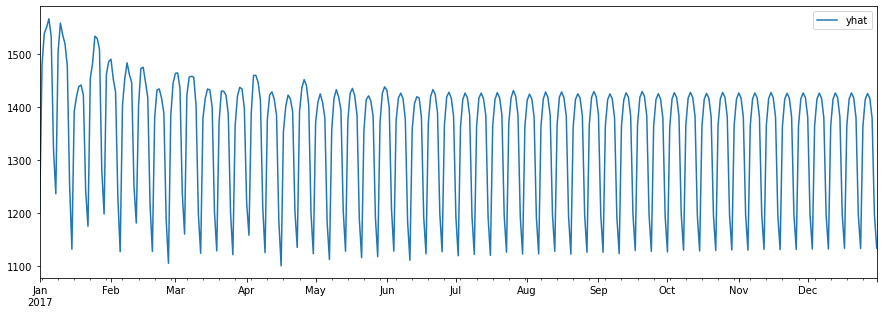

In [8]:
model = AutoReg(train, range(20, 100), trend='c').fit()
t = pd.DataFrame({
    'yhat': model.predict(start=test.index.min(), end=test.index.max()),
#     'y': test
})
t.plot(figsize=(15, 5))

In [12]:
train = pd.DataFrame({'y': train})

/var/folders/5m/hv7mb0z95vnfhz0xb0s_rxym0000gn/T/ipykernel_32576/3750950379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x1'] = train.y.shift(1)
/var/folders/5m/hv7mb0z95vnfhz0xb0s_rxym0000gn/T/ipykernel_32576/3750950379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x2'] = train.y.shift(2)
/var/folders/5m/hv7mb0z95vnfhz0xb0s_rxym0000gn/T/ipykernel_32576/3750950379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

<AxesSubplot:xlabel='Date'>

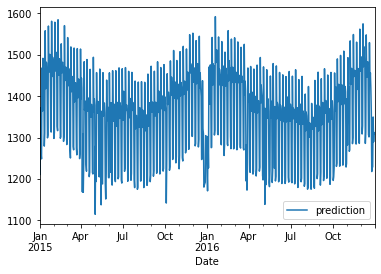

In [22]:
train['x1'] = train.y.shift(1)
train['x2'] = train.y.shift(2)
train['x3'] = train.y.shift(3)
train = train.dropna()
X, y = train.drop(columns='y'), train.y

model = LinearRegression().fit(X, y)
model.score(X, y)
train['prediction'] = model.predict(X)
train['2015':][['prediction']].plot()

In [25]:
train['error'] = train.y - train.prediction

<AxesSubplot:xlabel='Date'>

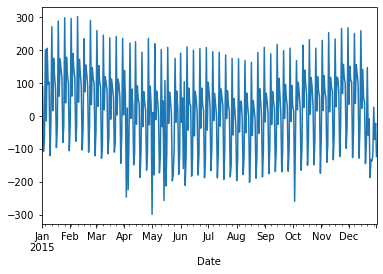

In [27]:
train.error['2015'].plot()